# IBM Quantum Challenge 2020 November - Exercise 1-a

[Notebook containing the challenge exercise](https://github.com/qiskit-community/IBMQuantumChallenge2020/blob/main/exercises/week-1/ex_1a_en.ipynb)

## Dependencies

In [1]:
from qiskit import Aer, ClassicalRegister, execute, QuantumCircuit, QuantumRegister
import numpy as np

## A Simplified Multi-control Toffoli Gate

In [2]:
def rccx(qc, a, b, c):
    """Function to implement a simplified two-control Toffoli gate.

    Parameters
    ----------
    qc : :class:`qiskit.QuantumCircuit`
        Quantum Circuit.
    a : int
        Index of the first control qbit.
    b : int
        Index of the second control qbit.
    c : int
        Index of the target qbit.
    """
    
    # a simplified implementation of
    # qc.cx(b, c)
    # qc.cz(a, c)
    # qc.ch(b, c)
    # by combining single-qbit operations
    qc.u(np.pi / 2, np.pi / 4, np.pi, c)
    qc.cx(b, c)
    qc.tdg(c)
    qc.cx(a, c)
    qc.t(c)
    qc.cx(b, c)
    qc.u(np.pi / 2, 0, 3 * np.pi / 4, c)

## The Full Adder

In [3]:
def comp_add(qc, bs, s, c):
    """Function to compute a full adder.

    Parameters
    ----------
    qc : :class:`qiskit.QuantumCircuit`
        Quantum Circuit.
    bs : list
        Indices of the first, second and carry-in qbits.
    s : int
        Index of the sum qbit.
    c : int
        Index of the carry qbit.
    """
    
    # XOR of fist and second bit to sum
    qc.cx(bs[0], s)
    qc.cx(bs[1], s)

    # AND of first and second bit to carry
    rccx(qc, bs[0], bs[1], c)

    # AND of carry-in and sum to carry
    rccx(qc, bs[2], s, c)

    # flip sum via carry-in
    qc.cx(bs[2], s)

## The Quantum Circuit

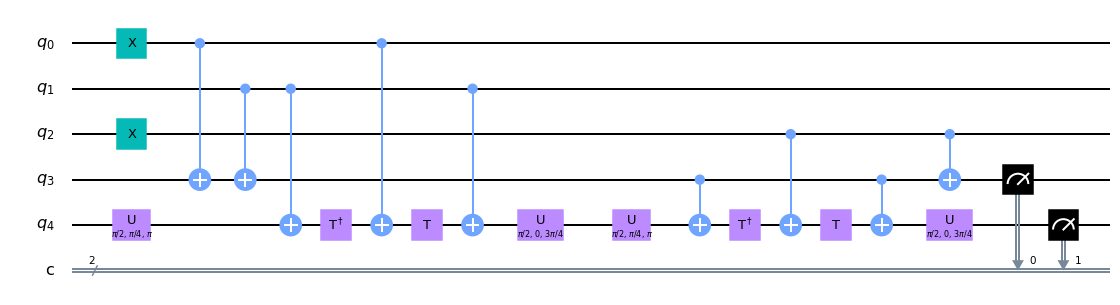

In [4]:
# first three qbits represent first, second and carry-in
# fouth and fifth qbits are the sum and carry
q = QuantumRegister(5, 'q')
# two cbits to measure the sum and carry qbits
c = ClassicalRegister(2, 'c')
# quantum circuit consisting of the qbits and cbits
qc = QuantumCircuit(q, c)

# initialize as per given format
# A -> 1
# B -> 0
# C -> 1
qc.x(q[0])
qc.x(q[2])

# full adder 
comp_add(qc, [0, 1, 2], 3, 4)

# measure
qc.measure([3, 4], c)

# display
qc.draw(output='mpl')

## The Simulation

In [5]:
# execute the quantum circuit on the backend
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=8000)

# obtain the result
result = job.result()
result.get_counts()

{'10': 8000}

## Grading

In [6]:
# dependencies for calculating cost
from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import Unroller

# calculate cost
ur = Unroller(['u3', 'cx'])
pm = PassManager(ur)
qc_cost = pm.run(qc) 
op_dict = qc_cost.count_ops()
# given criteria to calculate cost
print('Cost: {}'.format(op_dict['u3'] + op_dict['cx'] * 10))

Cost: 100
